# create all the figures

In [1]:
import json
from pathlib import Path

import h5netcdf
import matplotlib.pyplot as plt
from matplotlib import colors
import numpy as np

In [2]:
plt.style.use("default")
plt.rcParams.update(
    {
        "savefig.pad_inches": 0,
        "axes.titlesize": 8,
        "axes.titlepad": 3,
        "xtick.labelsize": 8,
        "ytick.labelsize": 8,
        "axes.labelsize": 8,
        "legend.fontsize": 8,
    }
)
figdpi: int = 300

In [3]:
# output directory
FIGUREROOT = Path("../fig/")
DATAROOT = Path("../data")

In [4]:
# China boundaries and mask
CNBOUNDARYFILE = DATAROOT.joinpath("china_province_boundaries.json")
with open(CNBOUNDARYFILE, "r", encoding="utf8") as f:
    cnboundaries = json.load(f)


def plot_cnboundaries(ax):
    for f in cnboundaries["features"]:
        for c in f["geometry"]["coordinates"]:
            if len(c) != 1:
                ax.plot(*zip(*c), color="black", linewidth=0.5)
            else:
                for cc in c:
                    ax.plot(*zip(*cc), color="black", linewidth=0.5)
    ax.set_xticks([80, 100, 120])
    ax.set_xticklabels(["80°E", "100°E", "120°E"])
    ax.set_yticks([20, 30, 40, 50])
    ax.set_yticklabels(["20°N", "30°N", "40°N", "50°N"])
    ax.set_ylim(17.8, 54)
    ax.set_xlim(73, 135.5)
    ax.set_aspect("equal")


with h5netcdf.File(DATAROOT.joinpath("mask.nc")) as f:
    lon: np.ndarray = f["lon"][:]
    lat: np.ndarray = f["lat"][:]
    mask: np.ndarray = f["mask"][0, :, :] == 1
lat2d, lon2d = np.meshgrid(lat, lon, indexing="ij")
area = (6371.0 * np.deg2rad(0.1)) ** 2 * np.cos(np.deg2rad(lat2d))
areaofchina = np.nansum(np.where(mask, area, np.nan))

In [5]:
daysofmonth = np.array([31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31])
daysofyear = np.sum(daysofmonth)
secsofyear = daysofyear * 24 * 60 * 60
month_weights = daysofmonth / daysofyear

In [6]:
# input data files
# 10 years
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.2011-2020.nc")) as f:
    sradtmy10yr: np.ndarray = f["srad"][...]
with h5netcdf.File(DATAROOT.joinpath("cmfd.mya.2011-2020.nc")) as f:
    sradmya10yr: np.ndarray = f["srad"][...]

# 20 years
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.2001-2020.nc")) as f:
    sradtmy20yr: np.ndarray = f["srad"][...]
with h5netcdf.File(DATAROOT.joinpath("cmfd.mya.2001-2020.nc")) as f:
    sradmya20yr: np.ndarray = f["srad"][...]

# 30 years
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.1991-2020.nc")) as f:
    sradtmy30yr: np.ndarray = f["srad"][...]
with h5netcdf.File(DATAROOT.joinpath("cmfd.mya.1991-2020.nc")) as f:
    sradmya30yr: np.ndarray = f["srad"][...]

# 40 years
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.1981-2020.nc")) as f:
    sradtmy40yr: np.ndarray = f["srad"][...]
with h5netcdf.File(DATAROOT.joinpath("cmfd.mya.1981-2020.nc")) as f:
    sradmya40yr: np.ndarray = f["srad"][...]

# 50 years
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.1971-2020.nc")) as f:
    sradtmy50yr: np.ndarray = f["srad"][...]
with h5netcdf.File(DATAROOT.joinpath("cmfd.mya.1971-2020.nc")) as f:
    sradmya50yr: np.ndarray = f["srad"][...]

# without wind
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.nowind.1991-2020.nc")) as f:
    sradtmy30yr_nowind: np.ndarray = f["srad"][...]

# without temperature
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.notemp.1991-2020.nc")) as f:
    sradtmy30yr_notemp: np.ndarray = f["srad"][...]

# without dew point
with h5netcdf.File(DATAROOT.joinpath("cmfd.tmy.nodew.1991-2020.nc")) as f:
    sradtmy30yr_nodew: np.ndarray = f["srad"][...]

In [7]:
# annual total
sradtmy10yr_yr = np.average(sradtmy10yr, axis=0, weights=month_weights)
sradmya10yr_yr = np.average(sradmya10yr, axis=0, weights=month_weights)

sradtmy20yr_yr = np.average(sradtmy20yr, axis=0, weights=month_weights)
sradmya20yr_yr = np.average(sradmya20yr, axis=0, weights=month_weights)

sradtmy30yr_yr = np.average(sradtmy30yr, axis=0, weights=month_weights)
sradmya30yr_yr = np.average(sradmya30yr, axis=0, weights=month_weights)

sradtmy40yr_yr = np.average(sradtmy40yr, axis=0, weights=month_weights)
sradmya40yr_yr = np.average(sradmya40yr, axis=0, weights=month_weights)

sradtmy50yr_yr = np.average(sradtmy50yr, axis=0, weights=month_weights)
sradmya50yr_yr = np.average(sradmya50yr, axis=0, weights=month_weights)

sradtmy30yr_yr_nowind = np.average(sradtmy30yr_nowind, axis=0, weights=month_weights)
sradtmy30yr_yr_notemp = np.average(sradtmy30yr_notemp, axis=0, weights=month_weights)
sradtmy30yr_yr_nodew = np.average(sradtmy30yr_nodew, axis=0, weights=month_weights)

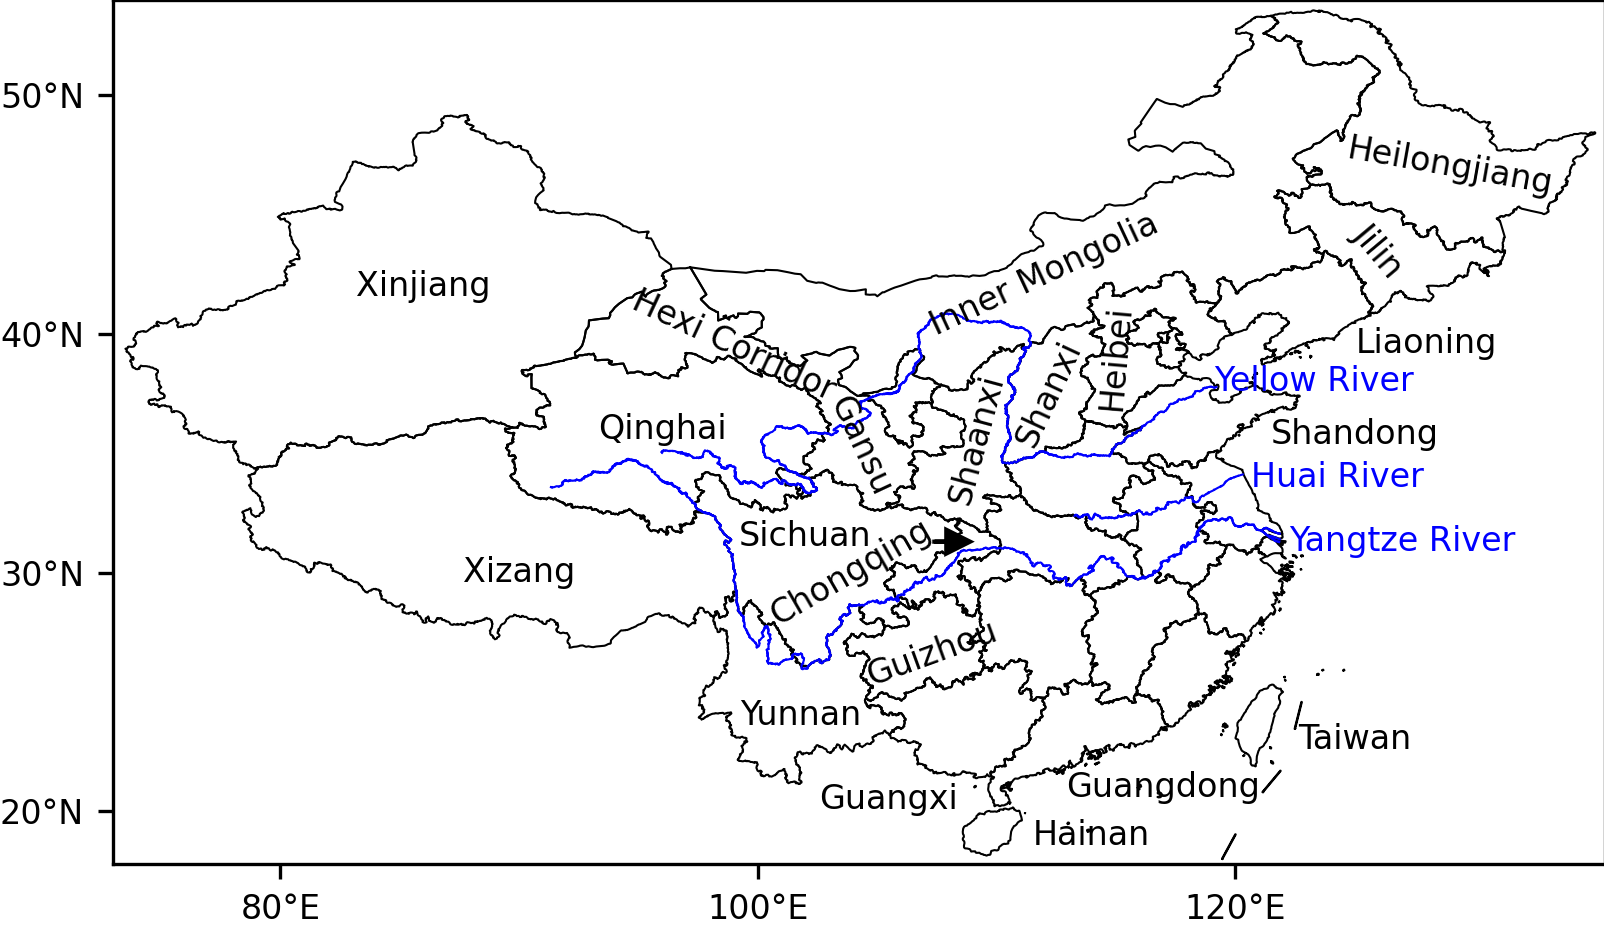

In [8]:
# map of China
fig = plt.figure(figsize=(13.8 / 2.54, 9 / 2.54), dpi=figdpi, layout="constrained")
ax = fig.subplots(1, 1)

CJCENTERLINEFILE = DATAROOT.joinpath("yangtze.geojson")
with open(CJCENTERLINEFILE, "r", encoding="utf8") as f:
    cjcenterline = json.load(f)

HHCENTERLINEFILE = DATAROOT.joinpath("huai.geojson")
with open(HHCENTERLINEFILE, "r", encoding="utf8") as f:
    hhcenterline = json.load(f)

YRCENTERLINEFILE = DATAROOT.joinpath("yellowriver.geojson")
with open(YRCENTERLINEFILE, "r", encoding="utf8") as f:
    yrcenterline = json.load(f)

plot_cnboundaries(ax)
for f in hhcenterline["features"]:
    for c in f["geometry"]["coordinates"]:
        if len(c) != 1:
            ax.plot(*zip(*c), color="blue", linewidth=0.5)
        else:
            for cc in c:
                ax.plot(*zip(*cc), color="blue", linewidth=0.5)
for f in cjcenterline["features"]:
    for c in f["geometry"]["coordinates"]:
        if len(c) != 1:
            ax.plot(*zip(*c), color="blue", linewidth=0.5)
        else:
            for cc in c:
                ax.plot(*zip(*cc), color="blue", linewidth=0.5)
for f in yrcenterline["features"]:
    for c in f["geometry"]["coordinates"]:
        if len(c) != 1:
            ax.plot(*zip(*c), color="blue", linewidth=0.5)
        else:
            for cc in c:
                ax.plot(*zip(*cc), color="blue", linewidth=0.5)
ax.text(127, 31.3, "Yangtze River", fontsize=8, color="blue", va="center", ha="center")
ax.text(124.3, 34, "Huai River", fontsize=8, color="blue", va="center", ha="center")
ax.text(123.3, 38, "Yellow River", fontsize=8, color="blue", va="center", ha="center")

ax.text(86, 42, "Xinjiang", fontsize=8, ha="center", va="center")
ax.text(90, 30, "Xizang", fontsize=8, va="center", ha="center")
ax.text(96, 36, "Qinghai", fontsize=8, va="center", ha="center")
ax.text(112, 42.5, "Inner Mongolia", rotation=25, fontsize=8, ha="center", va="center")
ax.text(102, 31.5, "Sichuan", fontsize=8, ha="center", va="center")
ax.text(103.9, 30, "Chongqing", fontsize=8, rotation=30, va="center", ha="center")
ax.arrow(107.4, 31.3, 0.5, 0, lw=1, head_length=1, head_width=1, color="black")
ax.text(107.3, 26.6, "Guizhou", fontsize=8, rotation=20, va="center", ha="center")
ax.text(99, 39.5, "Hexi Corridor", fontsize=8, rotation=-25, va="center", ha="center")
# ax.text(97, 40.3, 'Gansu', fontsize=8, rotation=-15, va='center', ha='center')
ax.text(104.3, 35.3, "Gansu", fontsize=8, rotation=-65, va="center", ha="center")
ax.text(109.2, 35.6, "Shaanxi", fontsize=8, rotation=75, va="center", ha="center")
ax.text(112.2, 37.5, "Shanxi", fontsize=8, rotation=65, va="center", ha="center")
ax.text(115, 39, "Heibei", fontsize=8, rotation=85, va="center", ha="center")
ax.text(129, 47, "Heilongjiang", fontsize=8, rotation=-10, va="center", ha="center")
ax.text(126, 43.5, "Jilin", fontsize=8, rotation=-50, va="center", ha="center")
ax.text(128, 39.6, "Liaoning", fontsize=8, va="center", ha="center")
ax.text(125, 35.8, "Shandong", fontsize=8, va="center", ha="center")
# ax.text(126.2, 30.3, 'Shanghai', fontsize=8, va='center', ha='center')
ax.text(101.8, 24, "Yunnan", fontsize=8, ha="center", va="center")
ax.text(105.5, 20.5, "Guangxi", fontsize=8, ha="center", va="center")
ax.text(117, 21, "Guangdong", fontsize=8, ha="center", va="center")
ax.text(125, 23, "Taiwan", fontsize=8, va="center", ha="center")
ax.text(114, 19, "Hainan", fontsize=8, va="center", ha="center")


fig.savefig(FIGUREROOT.joinpath("map.png"), dpi=figdpi)

0.2776622
0.42124575
0.28901368
0.008290439
0.035367947
0.01852741
0.016840536


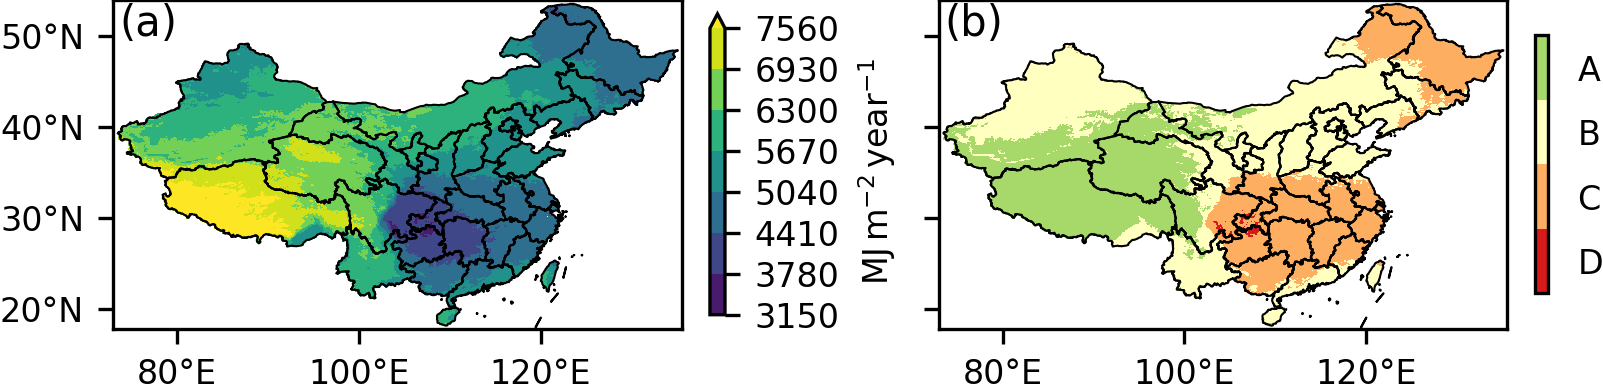

In [9]:
# resource abundance
fig = plt.figure(figsize=(13.8 / 2.54, 4 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(1, 2)
vallevels = np.array([3150, 3780, 4410, 5040, 5670, 6300, 6930, 7560])
gradebounds = [
    0,
    3780,
    5040,
    6300,
    10000,
]

x = np.where(mask, sradtmy30yr_yr, np.nan) * daysofyear * 8.64e-2
y = np.where(mask, sradmya30yr_yr, np.nan) * daysofyear * 8.64e-2

print(area[x >= 6300.0].sum() / areaofchina)
print(area[np.logical_and(x >= 5040.0, x < 6300.0)].sum() / areaofchina)
print(area[np.logical_and(x >= 3780.0, x < 5040.0)].sum() / areaofchina)
print(area[x < 3780.0].sum() / areaofchina)

ax = axs[0]
cf = ax.contourf(lon, lat, x, levels=vallevels, extend="max")
plot_cnboundaries(ax)
ax.text(0.01, 0.99, "(a)", transform=ax.transAxes, ha="left", va="top", fontsize=10)
# ax.set_title("(a) Annual Solar Radiation 1991–2020")

cb = plt.colorbar(
    cf, ax=axs[0], shrink=0.7, extend="both", label=r"$\mathrm{MJ\,m^{-2}\,year^{-1}}$"
)

ticks = [
    1890,
    4410,
    5670,
    8150,
]

norm = colors.BoundaryNorm(gradebounds, 4)
cmap = colors.ListedColormap(
    ["#d7191c", "#fdae61", "#ffffbf", "#a6d96a"]
).with_extremes(over="red", under="blue")

ax = axs[1]
cf = ax.contourf(lon, lat, x, levels=gradebounds, norm=norm, cmap=cmap)
plot_cnboundaries(ax)
ax.set_yticklabels([])
ax.text(0.01, 0.99, "(b)", transform=ax.transAxes, ha="left", va="top", fontsize=10)


cb = plt.colorbar(cf, ax=axs[1], shrink=0.6)
cb.set_ticks(ticks=ticks, labels=["D", "C", "B", "A"])
cb.minorticks_off()
cb.ax.tick_params(right=False)

gx = np.zeros_like(x, dtype="i8")
gx[x >= 6300] = 4
gx[np.logical_and(x >= 5040, x < 6300)] = 3
gx[np.logical_and(x >= 3780, x < 5040)] = 2
gx[x < 3780] = 1
gy = np.zeros_like(y, dtype="i8")
gy[y >= 0.47] = 4
gy[np.logical_and(y >= 5040, y < 6300)] = 3
gy[np.logical_and(y >= 3780, y < 5040)] = 2
gy[y < 3780] = 1

z = np.sign(gy - gx, dtype="f4") / 2.0
z[~mask] = np.nan
z[gy == gx] = np.nan

print(area[np.isfinite(z)].sum() / areaofchina)
print(area[z > 0].sum() / areaofchina)
print(area[z < 0].sum() / areaofchina)

fig.savefig(FIGUREROOT.joinpath("tmy-resource-grade.png"), dpi=figdpi)

[3.78929348 4.5916855  6.55224475]
[3.05018015 3.64013113 4.8994729 ]
[2.1835561  2.69785262 3.83472242]
[3.13308481 3.91914787 5.62814938]


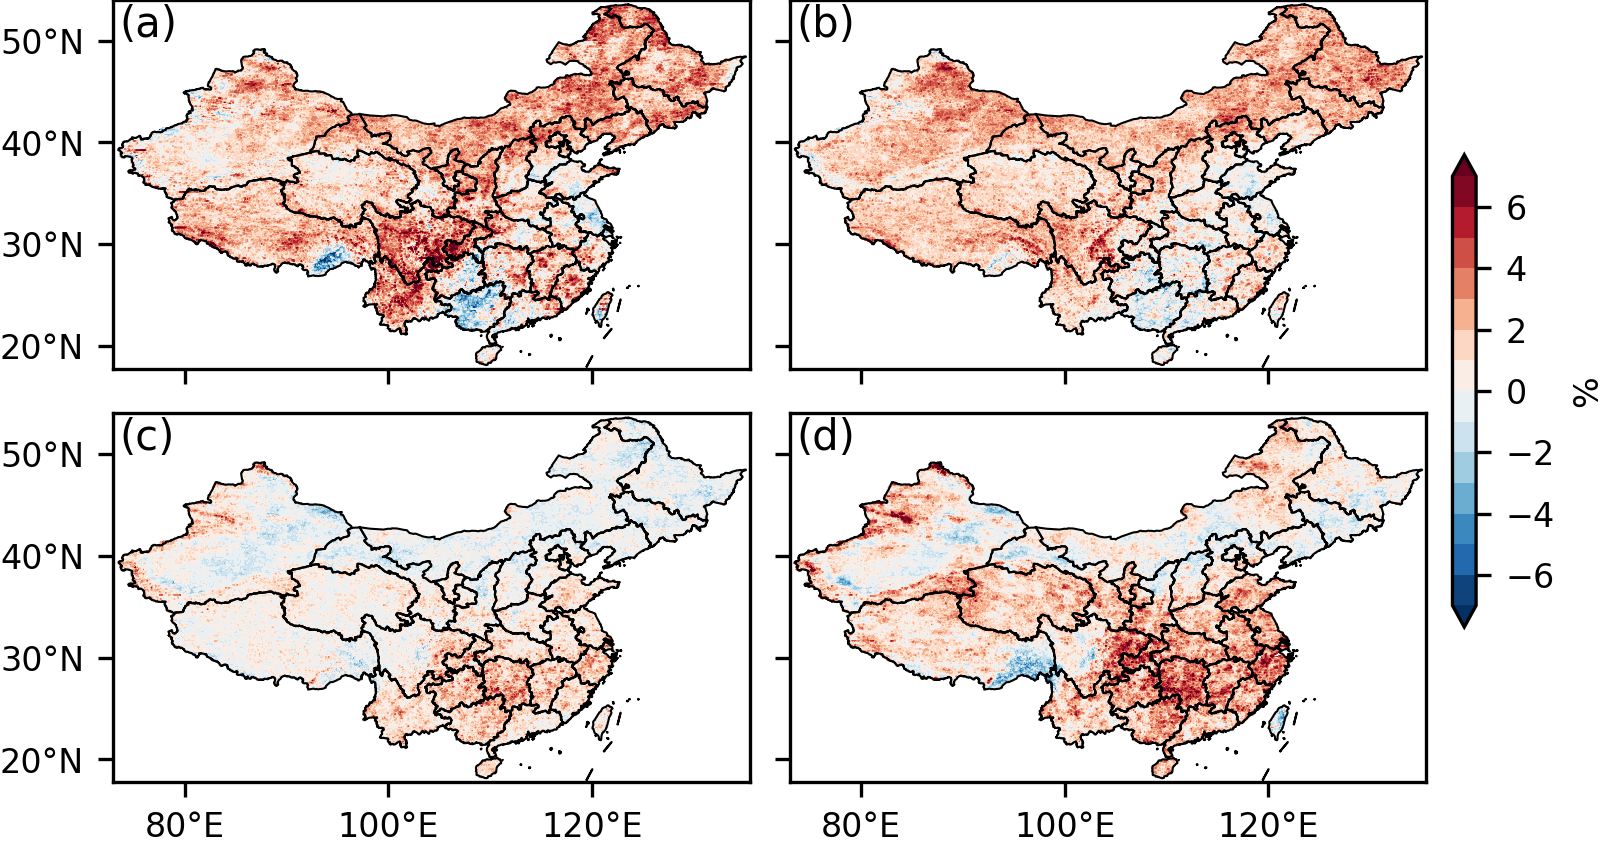

In [10]:
# impact of reference period length
fig = plt.figure(figsize=(13.8 / 2.54, 7.4 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(2, 2)
difflevels = np.arange(-7, 7.1, 1)

x = np.where(mask, sradtmy30yr_yr, np.nan) * daysofyear * 8.64e-2

y = np.where(mask, sradtmy10yr_yr, np.nan) * daysofyear * 8.64e-2
y = (y / x - 1.0) * 100.0
print(np.nanquantile(np.abs(y.flat), [0.90, 0.95, 0.99]))

ax = axs[0, 0]
cf = ax.contourf(lon, lat, y, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.text(0.01, 0.99, "(a)", transform=ax.transAxes, ha="left", va="top", fontsize=10)


y = np.where(mask, sradtmy20yr_yr, np.nan) * daysofyear * 8.64e-2
y = (y / x - 1.0) * 100.0
print(np.nanquantile(np.abs(y.flat), [0.90, 0.95, 0.99]))

ax = axs[0, 1]
cf = ax.contourf(lon, lat, y, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.01, 0.99, "(b)", transform=ax.transAxes, ha="left", va="top", fontsize=10)

y = np.where(mask, sradtmy40yr_yr, np.nan) * daysofyear * 8.64e-2
y = (y / x - 1.0) * 100.0
print(np.nanquantile(np.abs(y.flat), [0.90, 0.95, 0.99]))

ax = axs[1, 0]
cf = ax.contourf(lon, lat, y, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.text(0.01, 0.99, "(c)", transform=ax.transAxes, ha="left", va="top", fontsize=10)

y = np.where(mask, sradtmy50yr_yr, np.nan) * daysofyear * 8.64e-2
y = (y / x - 1.0) * 100.0
print(np.nanquantile(np.abs(y.flat), [0.90, 0.95, 0.99]))

ax = axs[1, 1]
cf = ax.contourf(lon, lat, y, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_yticklabels([])
ax.text(0.01, 0.99, "(d)", transform=ax.transAxes, ha="left", va="top", fontsize=10)

cb = plt.colorbar(cf, ax=axs, shrink=0.6, pad=0.02, extend="both", label="%")

fig.savefig(FIGUREROOT.joinpath("tmy-change-datalength.png"), dpi=figdpi)

[0.59884475 1.55331864 1.90147869 2.6932596 ]
-94.4295561360557 -103.32987631724897
-94.4295561360557 -103.32987631724897
[0.69889949 1.86459604 2.32795179 3.37998098]
-92.91216657350938 -105.81913061823218
-92.91216657350938 -105.81913061823218


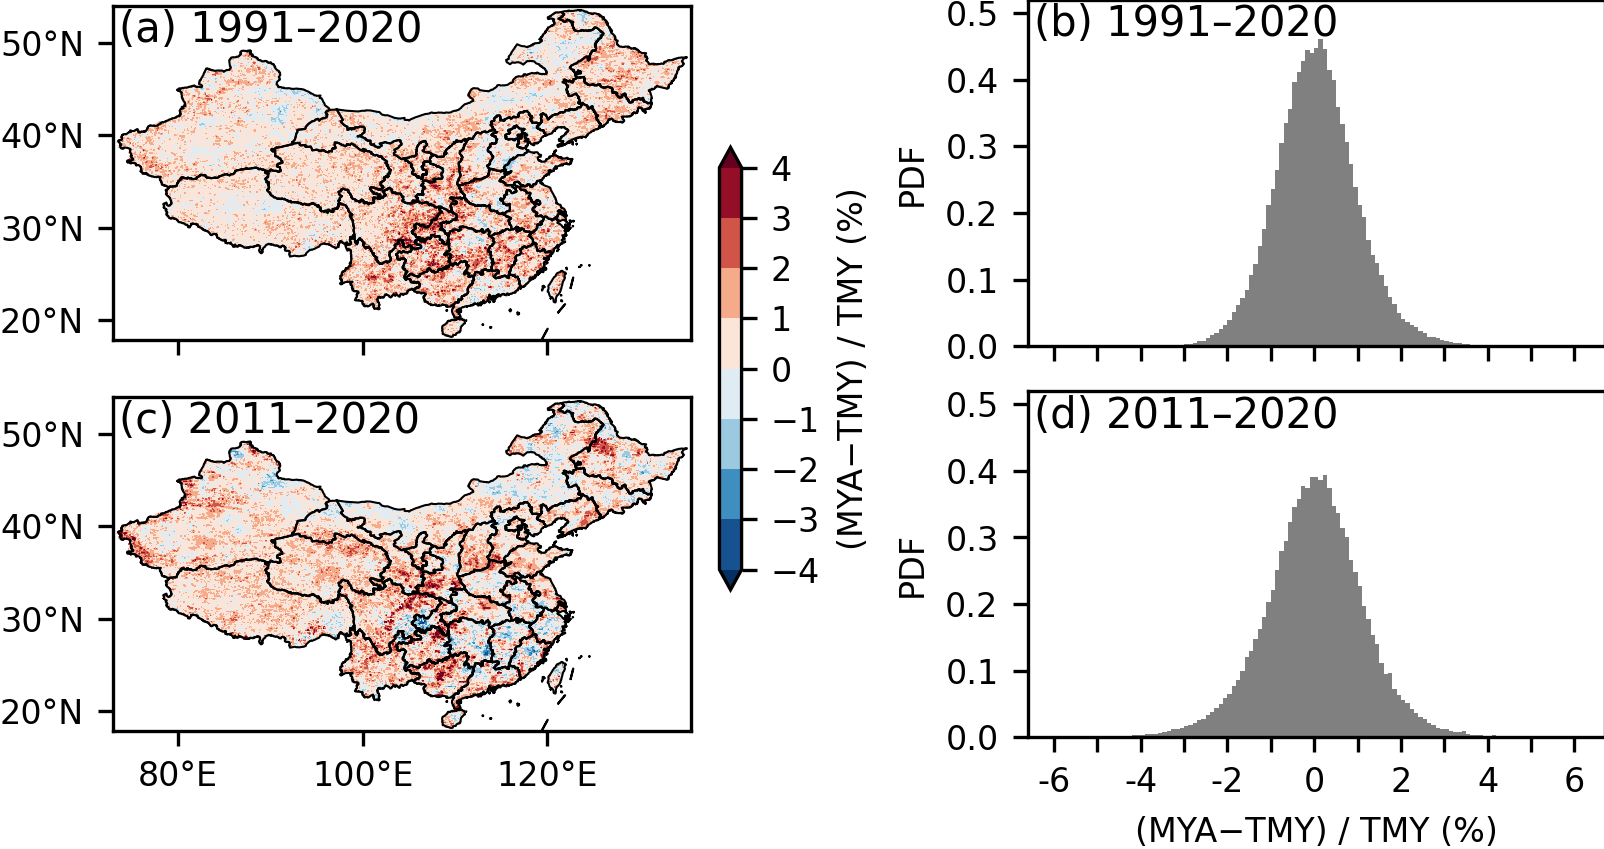

In [11]:
# difference between TMY and MYA in annual total
fig = plt.figure(figsize=(13.8 / 2.54, 7.4 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(2, 2)
difflevels = np.arange(-4, 5, 1)
bins = np.arange(-6, 6.2, 0.1)

x = np.where(mask, sradtmy30yr_yr, np.nan)
y = (np.where(mask, sradmya30yr_yr, np.nan) / x - 1.0) * 100.0

print(np.nanquantile(np.abs(y.flat), [0.5, 0.90, 0.95, 0.99]))

ax = axs[0, 0]
cf = ax.contourf(lon, lat, y, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.text(
    0.01,
    0.99,
    "(a) 1991–2020",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)
print(np.nanmax((y - x) / x * 100), np.nanmin((y - x) / x * 100))

ax = axs[0, 1]
ax.hist(y.flat, bins=bins, density=True, color="gray")
ax.set_xticks(np.arange(-6, 6.1, 1))
ax.set_xticklabels([])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_ylim(0, 0.52)
ax.set_ylabel("PDF")
ax.text(
    0.01,
    0.99,
    "(b) 1991–2020",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)
print(np.nanmax((y - x) / x * 100), np.nanmin((y - x) / x * 100))

x = np.where(mask, sradtmy10yr_yr, np.nan)
y = (np.where(mask, sradmya10yr_yr, np.nan) / x - 1.0) * 100.0
print(np.nanquantile(np.abs(y.flat), [0.5, 0.90, 0.95, 0.99]))

ax = axs[1, 0]
cf = ax.contourf(lon, lat, y, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.text(
    0.01,
    0.99,
    "(c) 2011–2020",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)
print(np.nanmax((y - x) / x * 100), np.nanmin((y - x) / x * 100))

ax = axs[1, 1]
ax.hist(y.flat, bins=bins, density=True, color="gray")
ax.set_xlabel("(MYA−TMY) / TMY (%)")
ax.set_xticks(np.arange(-6, 6.1, 1))
ax.set_xticklabels([str(int(x)) if x % 2 == 0 else "" for x in np.arange(-6, 6.1, 1)])
ax.set_yticks([0, 0.1, 0.2, 0.3, 0.4, 0.5])
ax.set_ylim(0, 0.52)
ax.set_ylabel("PDF")
ax.text(
    0.01,
    0.99,
    "(d) 2011–2020",
    transform=ax.transAxes,
    ha="left",
    va="top",
    fontsize=10,
)
print(np.nanmax((y - x) / x * 100), np.nanmin((y - x) / x * 100))

cb = plt.colorbar(
    cf, ax=axs[:, 0], shrink=0.6, extend="both", label="(MYA−TMY) / TMY (%)"
)

fig.savefig(FIGUREROOT.joinpath("mya-tmy-diff-hist.png"), dpi=figdpi)

0.3538556391334828 0.21560786997699866
0.43008474533102625 0.218888538938021
0.28223604504145994 0.15616640020554853
0.24721895828782292 0.073490550385001


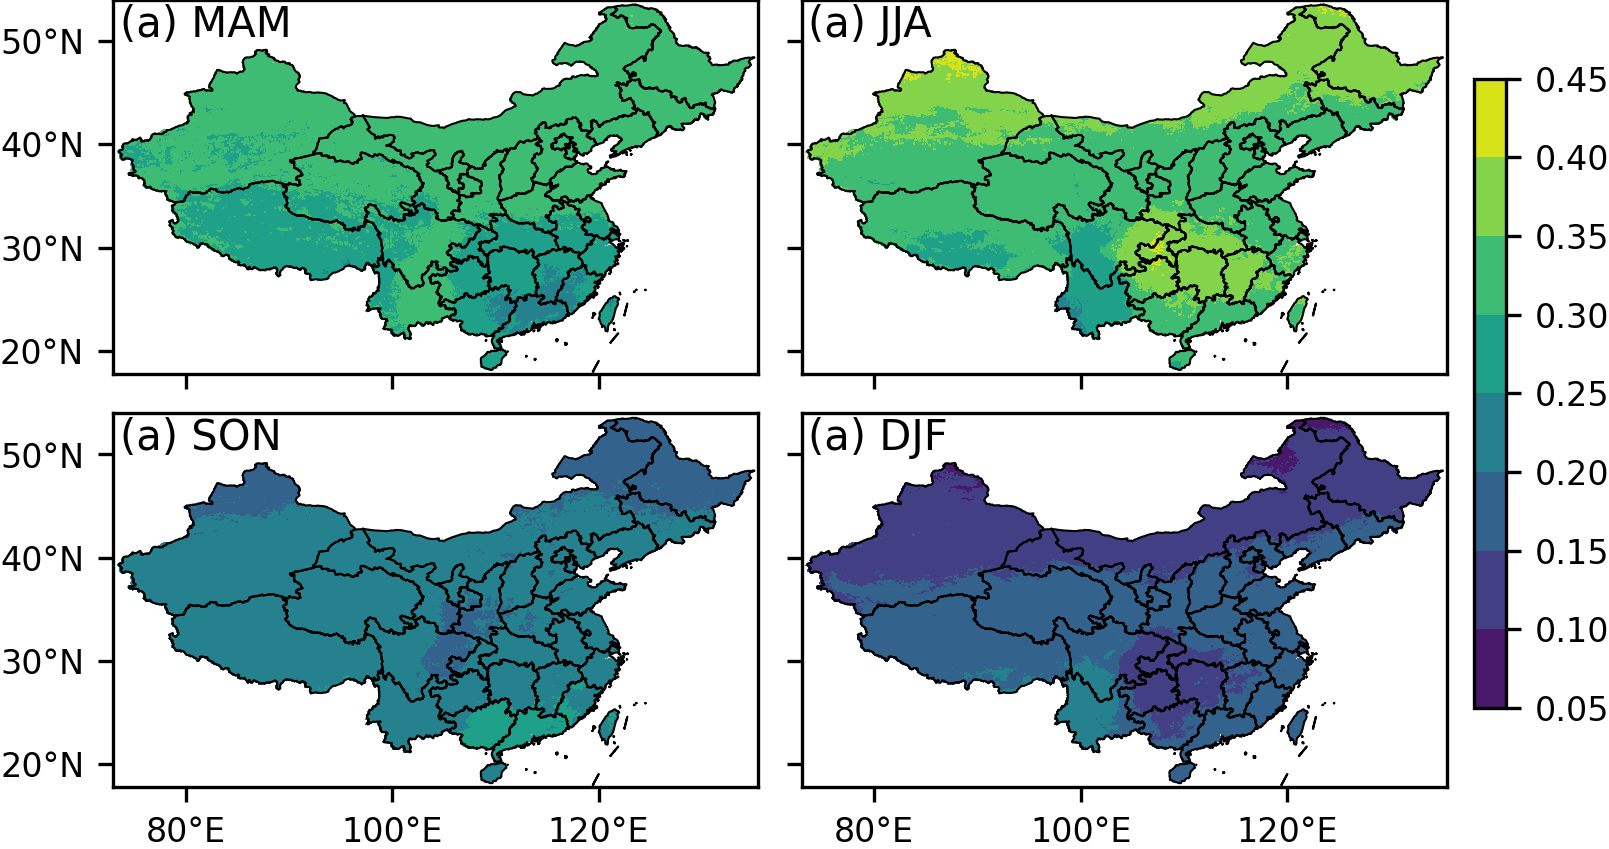

In [12]:
# seasonal fraction
fig = plt.figure(figsize=(13.8 / 2.54, 7.4 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(2, 2)
vallevels = np.arange(0.05, 0.46, 0.05)

imonths = (2, 3, 4)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.sum(daysofmonth[imonths,]) / daysofyear * x / sradtmy30yr_yr
print(np.nanmax(y), np.nanmin(y))

ax = axs[0, 0]
cf = ax.contourf(lon, lat, y, levels=vallevels)
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.text(0.01, 0.99, "(a) MAM", transform=ax.transAxes, ha="left", va="top", fontsize=10)


imonths = (5, 6, 7)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.sum(daysofmonth[imonths,]) / daysofyear * x / sradtmy30yr_yr
print(np.nanmax(y), np.nanmin(y))

ax = axs[0, 1]
cf = ax.contourf(lon, lat, y, levels=vallevels)
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.text(0.01, 0.99, "(a) JJA", transform=ax.transAxes, ha="left", va="top", fontsize=10)

imonths = (8, 9, 10)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.sum(daysofmonth[imonths,]) / daysofyear * x / sradtmy30yr_yr
print(np.nanmax(y), np.nanmin(y))

ax = axs[1, 0]
cf = ax.contourf(lon, lat, y, levels=vallevels)
plot_cnboundaries(ax)
ax.text(0.01, 0.99, "(a) SON", transform=ax.transAxes, ha="left", va="top", fontsize=10)

imonths = (11, 0, 1)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.sum(daysofmonth[imonths,]) / daysofyear * x / sradtmy30yr_yr
print(np.nanmax(y), np.nanmin(y))

ax = axs[1, 1]
cf = ax.contourf(
    lon,
    lat,
    y,
    levels=vallevels,
)
plot_cnboundaries(ax)
ax.set_yticklabels([])
ax.text(0.01, 0.99, "(a) DJF", transform=ax.transAxes, ha="left", va="top", fontsize=10)

cb = plt.colorbar(cf, ax=axs, shrink=0.8, pad=0.02, extend="both")
cb.set_ticks(vallevels)

fig.savefig(FIGUREROOT.joinpath("tmy-seasonal-fraction.png"), dpi=figdpi)

0.82353187 0.10036979
0.19293031
0.30472553
0.29825357
0.20030268


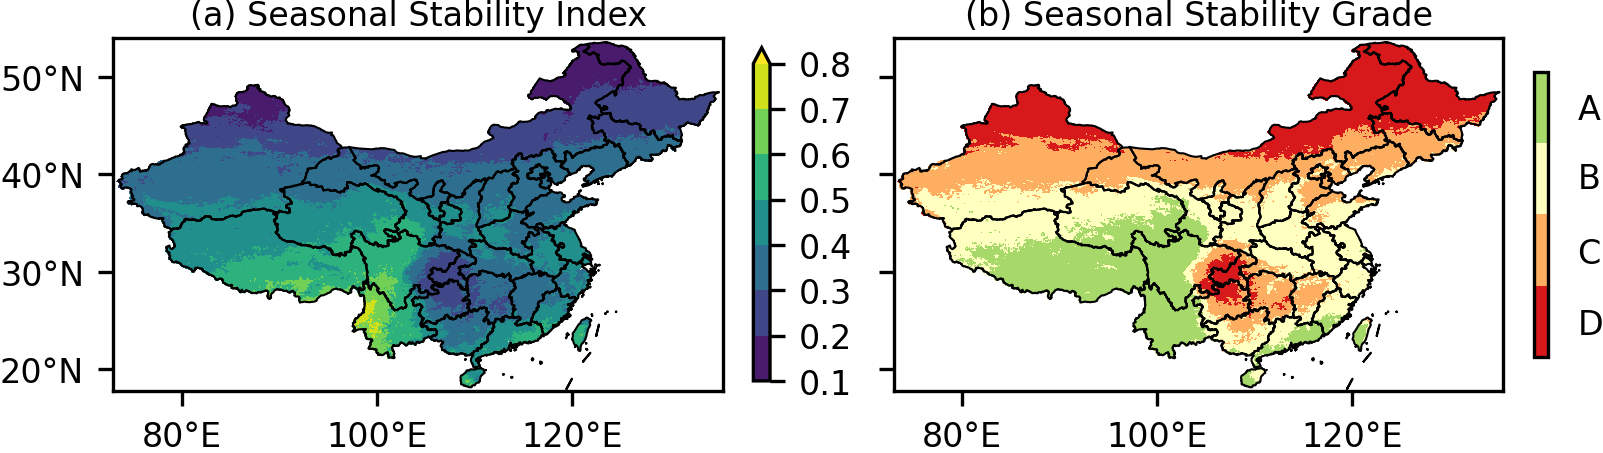

In [13]:
# seasonal stability index and grade
fig = plt.figure(figsize=(13.8 / 2.54, 4.3 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(1, 2)
gradebounds = [0, 0.28, 0.36, 0.47, 1.0]

x = np.where(
    mask,
    np.min(sradtmy30yr, axis=0) / np.max(sradtmy30yr, axis=0),
    np.nan,
)
print(np.nanmax(x), np.nanmin(x))

print(area[x >= 0.47].sum() / areaofchina)
print(area[np.logical_and(x >= 0.36, x < 0.47)].sum() / areaofchina)
print(area[np.logical_and(x >= 0.28, x < 0.36)].sum() / areaofchina)
print(area[x < 0.28].sum() / areaofchina)

ax = axs[0]
cf = ax.contourf(lon, lat, x, extend="max")
plot_cnboundaries(ax)
ax.set_title("(a) Seasonal Stability Index")

cb = plt.colorbar(cf, ax=axs[0], shrink=0.7, extend="both", label="")

ticks = [0.14, 0.32, 0.42, 0.74]

norm = colors.BoundaryNorm(gradebounds, 4)
cmap = colors.ListedColormap(
    ["#d7191c", "#fdae61", "#ffffbf", "#a6d96a"]
).with_extremes(over="red", under="blue")

ax = axs[1]
cf = ax.contourf(lon, lat, x, levels=gradebounds, norm=norm, cmap=cmap)
plot_cnboundaries(ax)
ax.set_yticklabels([])
ax.set_title("(b) Seasonal Stability Grade")

cb = plt.colorbar(cf, ax=axs[1], shrink=0.6)
cb.set_ticks(ticks=ticks, labels=["D", "C", "B", "A"])
cb.minorticks_off()
cb.ax.tick_params(right=False)

fig.savefig(FIGUREROOT.joinpath("tmy-seasonal-stability-index-grade.png"), dpi=figdpi)

[-1.13097494  0.028855    1.35554303]
[0.32151874 0.83470051 1.02453263 1.43803087]
[-1.39423318 -0.01124846  1.40362409]
[0.3674154  0.94388501 1.14643501 1.57909839]
[-9.62820665e-01 -9.29515739e-04  1.05600386e+00]
[0.25889374 0.66633341 0.81773369 1.15676181]
[-0.80512823  0.00206424  0.91534782]
[0.18449409 0.52601906 0.67269199 1.00257091]


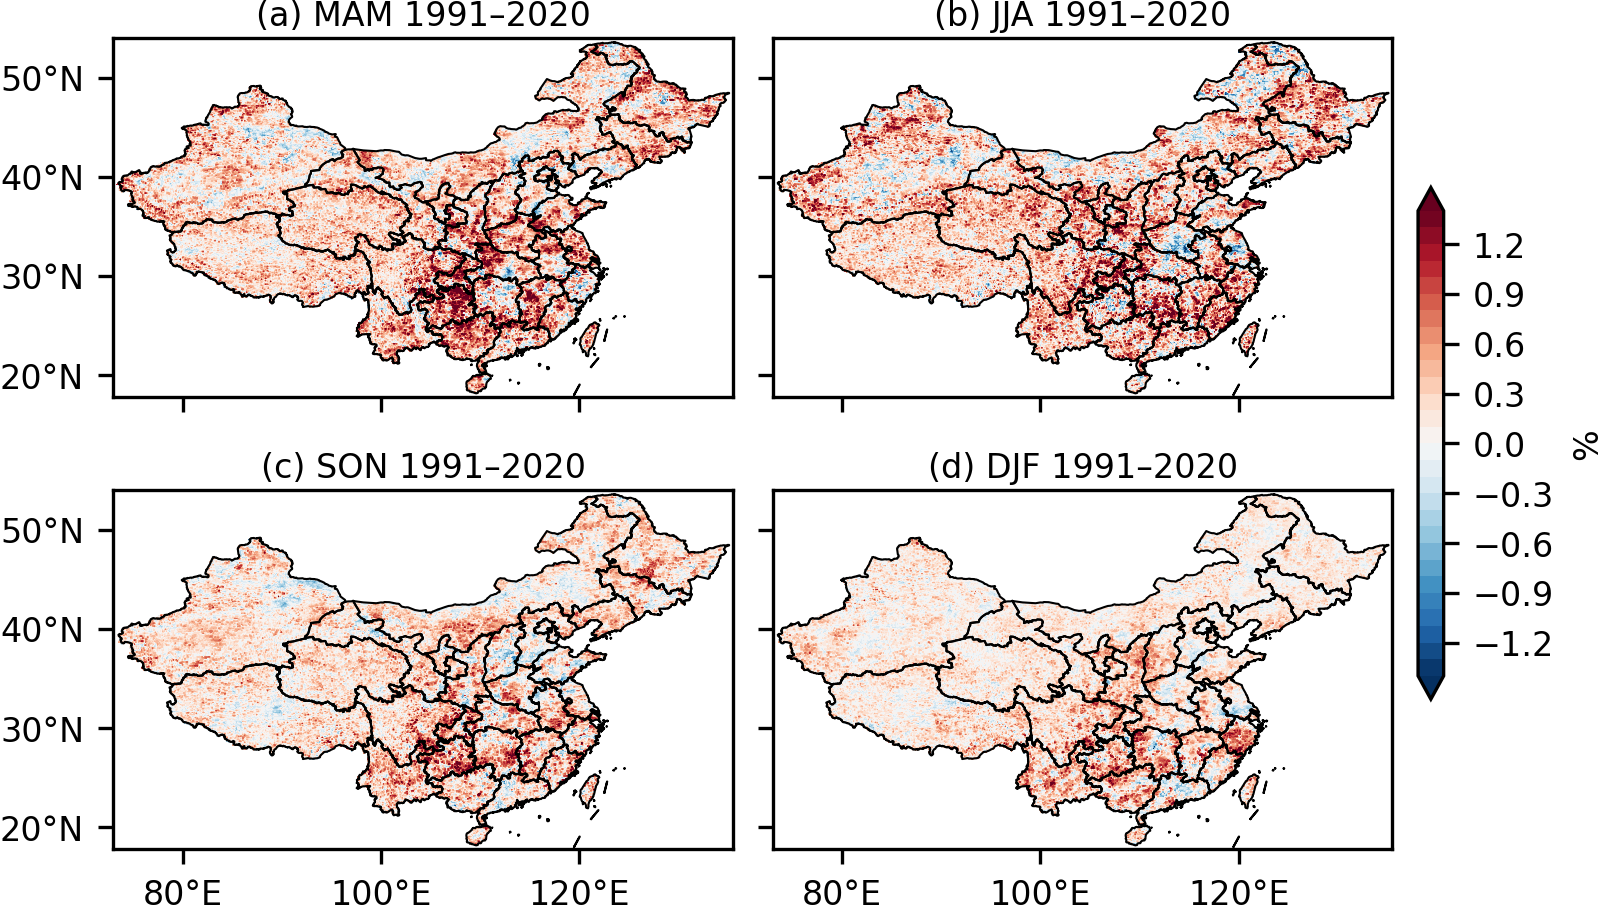

In [14]:
# difference between TMY and MYA in seasonal radiation
fig = plt.figure(figsize=(13.8 / 2.54, 8 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(2, 2)
difflevels = np.arange(-0.014, 0.0141, 0.001) * 100.0

imonths = (2, 3, 4)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.average(sradmya30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
z = np.sum(daysofmonth[imonths,]) / daysofyear * (y - x) / sradtmy30yr_yr * 100.0
print(np.nanquantile(z.flat, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z).flat, [0.5, 0.9, 0.95, 0.99]))

ax = axs[0, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_title("(a) MAM 1991–2020")

imonths = (5, 6, 7)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.average(sradmya30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
z = np.sum(daysofmonth[imonths,]) / daysofyear * (y - x) / sradtmy30yr_yr * 100.0
print(np.nanquantile(z.flat, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z).flat, [0.5, 0.9, 0.95, 0.99]))

ax = axs[0, 1]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_title("(b) JJA 1991–2020")

imonths = (8, 9, 10)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.average(sradmya30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
z = np.sum(daysofmonth[imonths,]) / daysofyear * (y - x) / sradtmy30yr_yr * 100.0
print(np.nanquantile(z.flat, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z).flat, [0.5, 0.9, 0.95, 0.99]))

ax = axs[1, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_title("(c) SON 1991–2020")

imonths = (11, 0, 1)
x = np.where(
    mask,
    np.average(sradtmy30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.average(sradmya30yr[imonths, ...], weights=month_weights[imonths,], axis=0),
    np.nan,
)
z = np.sum(daysofmonth[imonths,]) / daysofyear * (y - x) / sradtmy30yr_yr * 100.0
print(np.nanquantile(z.flat, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z).flat, [0.5, 0.9, 0.95, 0.99]))

ax = axs[1, 1]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_yticklabels([])
ax.set_title("(d) DJF 1991–2020")

cb = plt.colorbar(
    cf, ax=axs, shrink=0.9, fraction=0.02, pad=0.02, extend="both", label="%"
)

fig.savefig(FIGUREROOT.joinpath("mya-tmy-seasonal-30yr.png"), dpi=figdpi)

0.82353187 0.10036979
0.053998492658138275
0.20153089
0.31502512
0.2921924
0.18746364
0.10512903
0.072734416
0.032394618


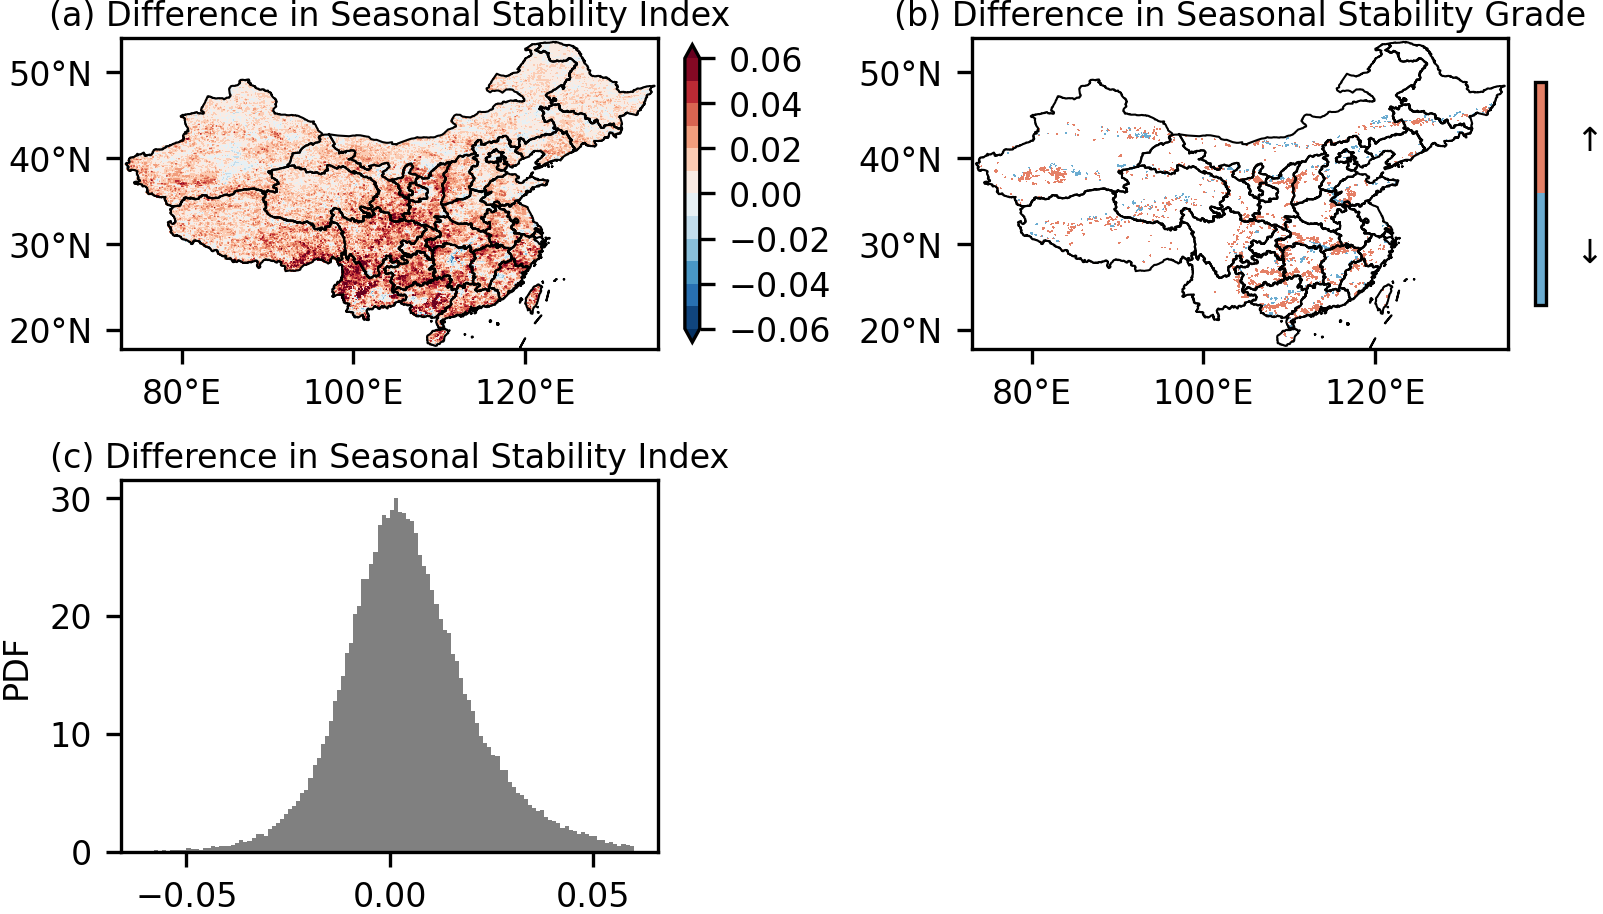

In [15]:
# Difference between TMY and MYA in seasonal variation and stability
fig = plt.figure(figsize=(13.8 / 2.54, 8 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(2, 2)

x = np.where(
    mask,
    np.min(sradtmy30yr, axis=0) / np.max(sradtmy30yr, axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.min(sradmya30yr, axis=0) / np.max(sradmya30yr, axis=0),
    np.nan,
)
print(np.nanmax(x), np.nanmin(x))
print(np.nanquantile(np.abs(y - x), 0.99))

print(area[y >= 0.47].sum() / areaofchina)
print(area[np.logical_and(y >= 0.36, y < 0.47)].sum() / areaofchina)
print(area[np.logical_and(y >= 0.28, y < 0.36)].sum() / areaofchina)
print(area[y < 0.28].sum() / areaofchina)

ax = axs[0, 0]
cf = ax.contourf(
    lon, lat, y - x, cmap="RdBu_r", levels=np.arange(-0.06, 0.061, 0.01), extend="both"
)
plot_cnboundaries(ax)
ax.set_title("(a) Difference in Seasonal Stability Index")

cb = plt.colorbar(cf, ax=axs[0, 0], shrink=0.8, extend="both", label="")

gx = np.zeros_like(x, dtype="i8")
gx[x >= 0.47] = 4
gx[np.logical_and(x >= 0.36, x < 0.47)] = 3
gx[np.logical_and(x >= 0.28, x < 0.36)] = 2
gx[x < 0.28] = 1
gy = np.zeros_like(y, dtype="i8")
gy[y >= 0.47] = 4
gy[np.logical_and(y >= 0.36, y < 0.47)] = 3
gy[np.logical_and(y >= 0.28, y < 0.36)] = 2
gy[y < 0.28] = 1

z = np.sign(gy - gx, dtype="f4") / 2.0
z[~mask] = np.nan
z[gy == gx] = np.nan

ax = axs[0, 1]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=np.arange(-1, 1.1, 1))
plot_cnboundaries(ax)
cb = plt.colorbar(cf, ax=axs[0, 1], shrink=0.6)
cb.set_ticks([-0.5, 0.5], labels=["↓", "↑"])
cb.minorticks_off()
cb.ax.tick_params(right=False)
ax.set_title("(b) Difference in Seasonal Stability Grade")

print(area[np.isfinite(z)].sum() / areaofchina)
print(area[z > 0].sum() / areaofchina)
print(area[z < 0].sum() / areaofchina)

ax = axs[1, 0]
ax.hist((y - x).flat, bins=np.arange(-0.06, 0.061, 0.001), density=True, color="gray")
ax.set_ylabel("PDF")
ax.set_title("(c) Difference in Seasonal Stability Index")

ax = axs[1, 1]
ax.set_visible(False)

fig.savefig(FIGUREROOT.joinpath("mya-seasonal-stability-index-grade.png"), dpi=figdpi)

[-2.23821753  0.01304368  2.43274293]
[1.48120776 1.85180097 2.70694812]
[-2.08767525 -0.004714    2.13241833]
[1.35222439 1.68251597 2.41226131]
[-2.18680685 -0.01068192  2.26221112]
[1.42704076 1.77028587 2.57266588]


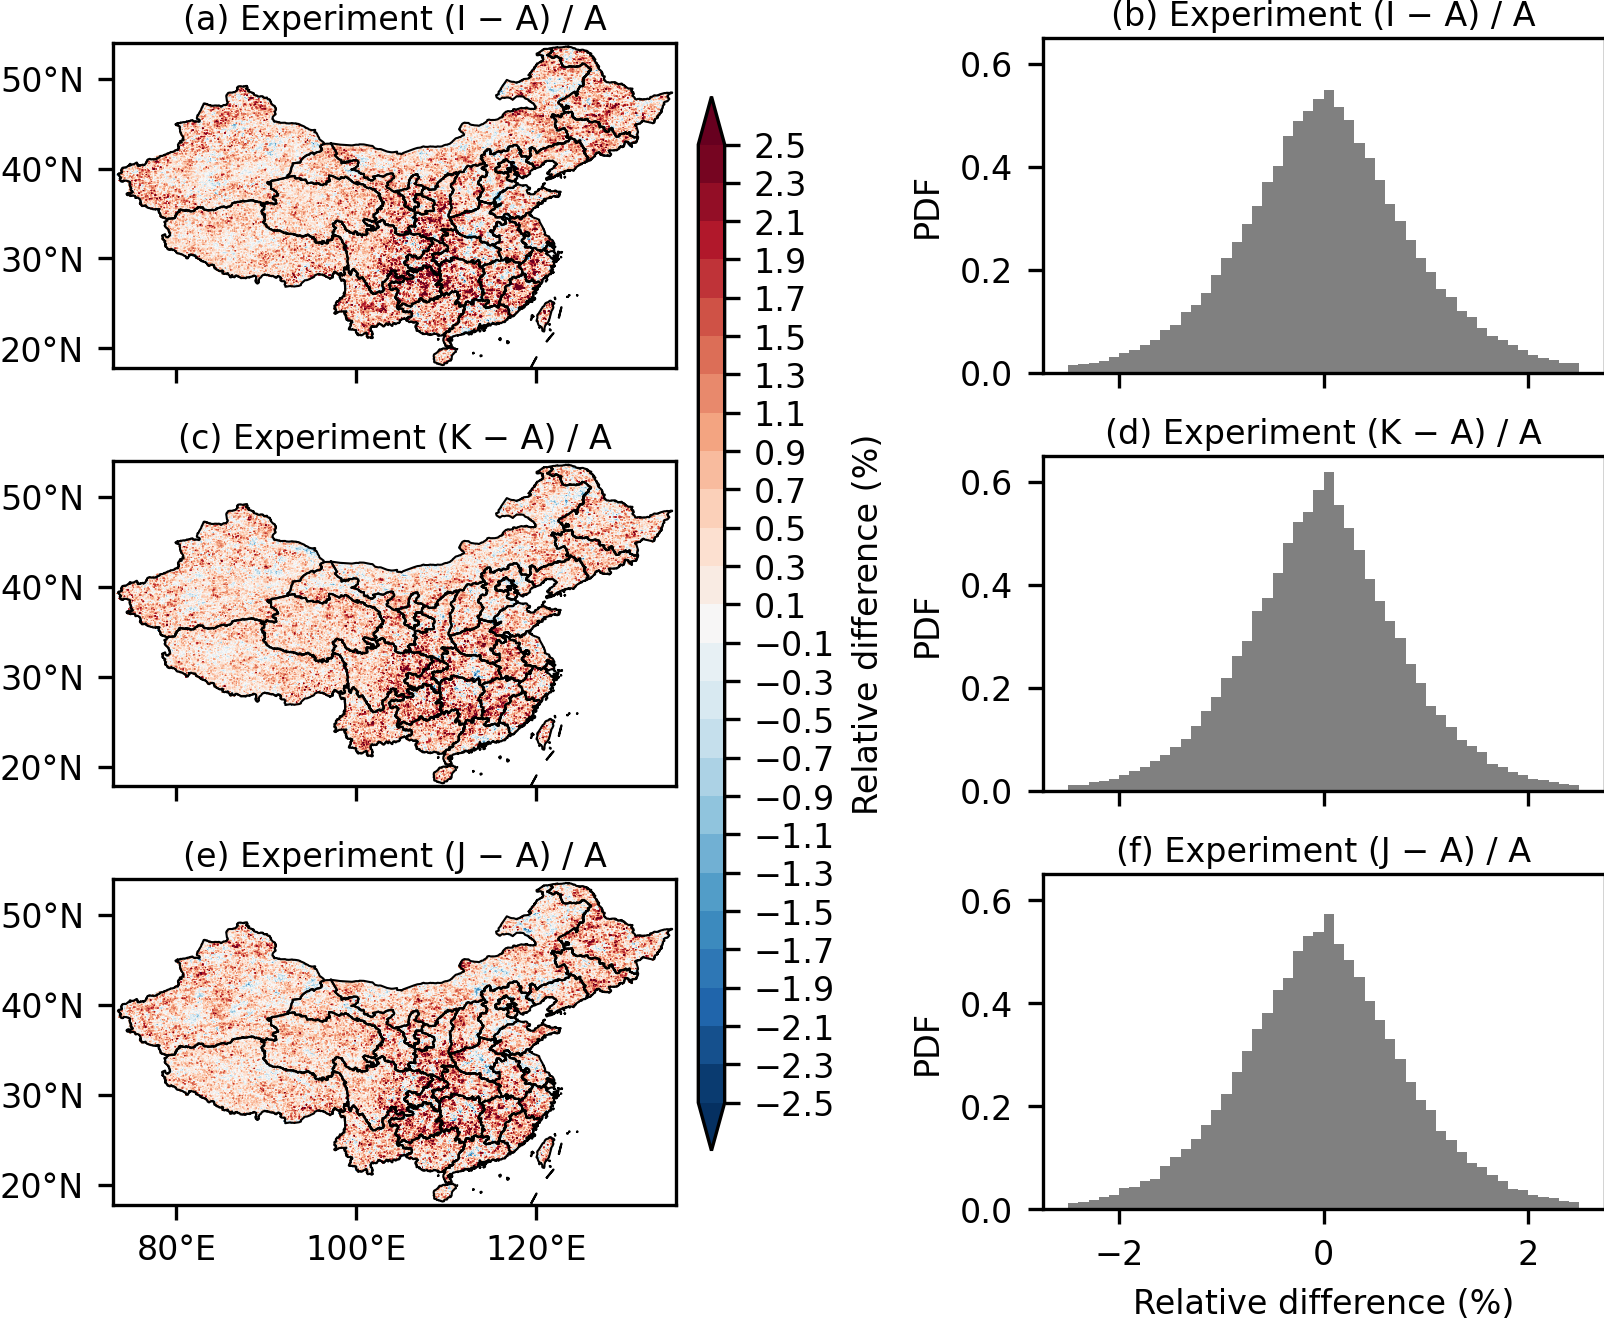

In [16]:
# impact of variables on annual total
fig = plt.figure(figsize=(13.8 / 2.54, 11.4 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(3, 2)

difflevels = np.arange(-2.5, 2.51, 0.2)
bins = np.arange(-2.5, 2.501, 0.1)

x = np.where(mask, sradtmy30yr_yr, np.nan)
y = np.where(mask, sradtmy30yr_yr_nowind, np.nan)
z = (y - x) / x * 100.0

ax = axs[0, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_title("(a) Experiment (I − A) / A")
print(np.nanquantile(z, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z), [0.9, 0.95, 0.99]))

ax = axs[0, 1]
ax.hist(z.flat, range=[-2.5, 2.5], bins=50, density=True, color="gray")
ax.set_ylim([0, 0.65])
ax.set_xticklabels([])
ax.set_ylabel("PDF")
ax.set_title("(b) Experiment (I − A) / A")

x = np.where(mask, sradtmy30yr_yr, np.nan)
y = np.where(mask, sradtmy30yr_yr_notemp, np.nan)
z = (y - x) / x * 100.0

ax = axs[1, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_title("(c) Experiment (K − A) / A")
print(np.nanquantile(z, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z), [0.9, 0.95, 0.99]))

ax = axs[1, 1]
ax.hist(z.flat, range=[-2.5, 2.5], bins=50, density=True, color="gray")
ax.set_ylim([0, 0.65])
ax.set_xticklabels([])
ax.set_ylabel("PDF")
ax.set_title("(d) Experiment (K − A) / A")

x = np.where(mask, sradtmy30yr_yr, np.nan)
y = np.where(mask, sradtmy30yr_yr_nodew, np.nan)
z = (y - x) / x * 100.0

ax = axs[2, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_title("(e) Experiment (J − A) / A")
print(np.nanquantile(z, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z), [0.9, 0.95, 0.99]))

ax = axs[2, 1]
ax.hist(z.flat, range=[-2.5, 2.5], bins=50, density=True, color="gray")
ax.set_ylim([0, 0.65])
ax.set_xlabel("Relative difference (%)")
ax.set_ylabel("PDF")
ax.set_title("(f) Experiment (J − A) / A")

cb_30yr = plt.colorbar(
    cf,
    ax=axs[:, 0],
    shrink=0.9,
    pad=0.04,
    aspect=40,
    extend="both",
    label="Relative difference (%)",
)
cb_30yr.set_ticks(difflevels)


fig.savefig(FIGUREROOT.joinpath("tmy-ann-var-sensitivity.png"), dpi=figdpi)

[-0.04534578  0.          0.04987643]
[0.0257975  0.03509474 0.05742288]
[-0.04174457  0.          0.04762882]
[0.02322069 0.03195771 0.0546028 ]
[-0.04196948  0.          0.04714283]
[0.02428895 0.03294685 0.05437452]


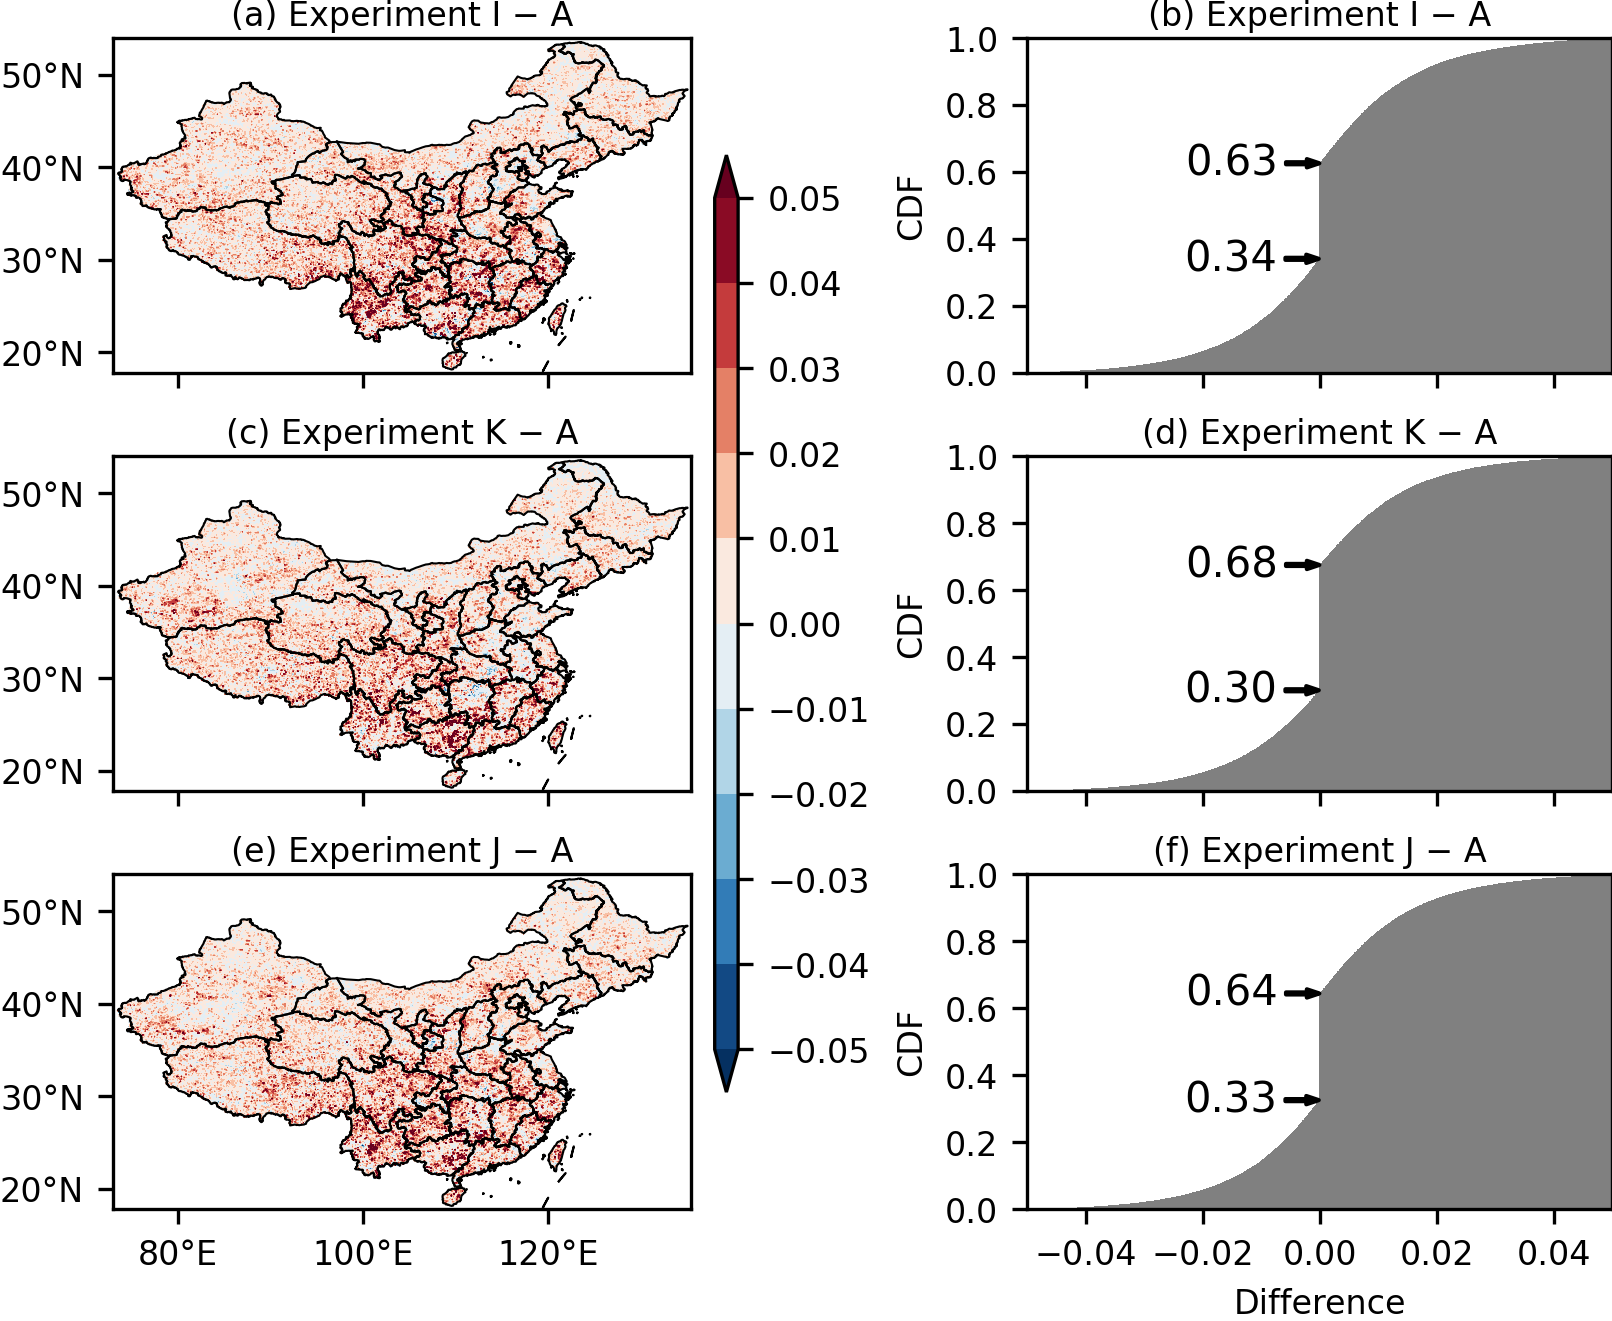

In [17]:
# impacts of variables on seasonal stability index
fig = plt.figure(figsize=(13.8 / 2.54, 11.4 / 2.54), dpi=figdpi, layout="constrained")
axs = fig.subplots(3, 2)

difflevels = np.arange(-0.05, 0.050001, 0.01)
bins = np.arange(-0.05, 0.05001, 0.0001)
idxl, idxr = 498, 499

x = np.where(
    mask,
    np.min(sradtmy30yr, axis=0) / np.max(sradtmy30yr, axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.min(sradtmy30yr_nowind, axis=0) / np.max(sradtmy30yr_nowind, axis=0),
    np.nan,
)
z = y - x
print(np.nanquantile(z, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z), [0.9, 0.95, 0.99]))

ax = axs[0, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_title("(a) Experiment I − A")

ax = axs[0, 1]
zz1 = ax.hist(
    z[mask],
    bins=bins,
    range=[-0.05, 0.05],
    density=True,
    cumulative=True,
    color="gray",
)
ax.set_xlim([-0.05, 0.05])
ax.set_ylim([0, 1])
ax.set_xticklabels([])
ax.set_ylabel("CDF")
ax.set_title("(b) Experiment I − A")
ax.annotate(
    f"{zz1[0][idxl]:.2f}",
    (zz1[1][idxl], zz1[0][idxl]),
    xytext=(-10, 0),
    textcoords="offset points",
    arrowprops=dict(color="black", width=0.5, headwidth=2, headlength=3),
    ha="right",
    va="center",
)
ax.annotate(
    f"{zz1[0][idxr]:.2f}",
    (zz1[1][idxr], zz1[0][idxr]),
    xytext=(-10, 0),
    textcoords="offset points",
    arrowprops=dict(color="black", width=0.5, headwidth=2, headlength=3),
    ha="right",
    va="center",
)

x = np.where(
    mask,
    np.min(sradtmy30yr, axis=0) / np.max(sradtmy30yr, axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.min(sradtmy30yr_notemp, axis=0) / np.max(sradtmy30yr_notemp, axis=0),
    np.nan,
)
z = y - x
print(np.nanquantile(z, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z), [0.9, 0.95, 0.99]))

ax = axs[1, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_xticklabels([])
ax.set_title("(c) Experiment K − A")

ax = axs[1, 1]
zz2 = ax.hist(
    z[mask],
    bins=bins,
    range=[-0.05, 0.05],
    density=True,
    cumulative=True,
    color="gray",
)
ax.set_xlim([-0.05, 0.05])
ax.set_ylim([0, 1])
ax.set_xticklabels([])
ax.set_ylabel("CDF")
ax.set_title("(d) Experiment K − A")
ax.annotate(
    f"{zz2[0][idxl]:.2f}",
    (zz2[1][idxl], zz2[0][idxl]),
    xytext=(-10, 0),
    textcoords="offset points",
    arrowprops=dict(color="black", width=0.5, headwidth=2, headlength=3),
    ha="right",
    va="center",
)
ax.annotate(
    f"{zz2[0][idxr]:.2f}",
    (zz2[1][idxr], zz2[0][idxr]),
    xytext=(-10, 0),
    textcoords="offset points",
    arrowprops=dict(color="black", width=0.5, headwidth=2, headlength=3),
    ha="right",
    va="center",
)

x = np.where(
    mask,
    np.min(sradtmy30yr, axis=0) / np.max(sradtmy30yr, axis=0),
    np.nan,
)
y = np.where(
    mask,
    np.min(sradtmy30yr_nodew, axis=0) / np.max(sradtmy30yr_nodew, axis=0),
    np.nan,
)
z = y - x
print(np.nanquantile(z, [0.01, 0.5, 0.99]))
print(np.nanquantile(np.abs(z), [0.9, 0.95, 0.99]))

ax = axs[2, 0]
cf = ax.contourf(lon, lat, z, cmap="RdBu_r", levels=difflevels, extend="both")
plot_cnboundaries(ax)
ax.set_title("(e) Experiment J − A")

ax = axs[2, 1]
zz3 = ax.hist(
    z[mask],
    bins=bins,
    range=[-0.05, 0.05],
    density=True,
    cumulative=True,
    color="gray",
)
ax.set_xlabel("Difference")
ax.set_xlim([-0.05, 0.05])
ax.set_ylim([0, 1])
ax.set_ylabel("CDF")
ax.set_title("(f) Experiment J − A")
ax.annotate(
    f"{zz3[0][idxl]:.2f}",
    (zz3[1][idxl], zz3[0][idxl]),
    xytext=(-10, 0),
    textcoords="offset points",
    arrowprops=dict(color="black", width=0.5, headwidth=2, headlength=3),
    ha="right",
    va="center",
)
ax.annotate(
    f"{zz3[0][idxr]:.2f}",
    (zz3[1][idxr], zz3[0][idxr]),
    xytext=(-10, 0),
    textcoords="offset points",
    arrowprops=dict(color="black", width=0.5, headwidth=2, headlength=3),
    ha="right",
    va="center",
)

cb = plt.colorbar(
    cf,
    ax=axs[:, 0],
    shrink=0.8,
    pad=0.04,
    aspect=40,
    extend="both",
)
cb.set_ticks(difflevels)


fig.savefig(FIGUREROOT.joinpath("tmy-sea-var-sensitivity.png"), dpi=figdpi)